In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [23]:
# Finding the too many zeros

realdata_dir = '/hdd/Ridgecrest/summer23/'
real_data = h5py.File(realdata_dir + 'gfast_test_demean_realdata.hdf5', 'r')
real_data = real_data['gfast_test_demean_realdata'][:,:]
real_metadata = np.load(realdata_dir + 'gfast_test_realdata_info.npy')

In [24]:
real_data.shape

(5610, 384)

In [25]:
real_metadata.shape

(5610, 4)

In [26]:
i = np.where(real_data > 10)[0] # Getting indices for samples with over 10 m of displacement to also remove
remove_dups_i = list(set(i))
remove_dups_i = np.sort(remove_dups_i)

glitch_indices = remove_dups_i

# for i in glitch_indices:
#     plt.plot(real_data[i])
#     plt.show()

In [27]:
nlen = 128

In [28]:
diff_N = np.diff(real_data[:, :nlen])
diff_E = np.diff(real_data[:, nlen:2*nlen])
diff_Z = np.diff(real_data[:, 2*nlen:])

diff2_N = np.diff(diff_N)
diff2_E = np.diff(diff_E)
diff2_Z = np.diff(diff_Z)

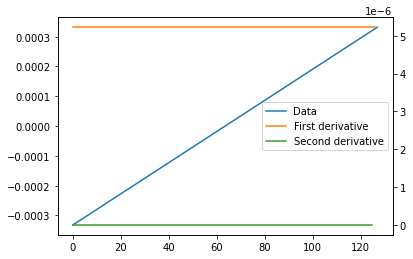

In [29]:
k = 502

fig, ax1 = plt.subplots()
ax1.plot(real_data[k, :nlen], color = 'C0', label = 'Data')
#     plt.show()
ax2 = ax1.twinx()
ax2.plot(diff_N[k], color = 'C1', label = 'First derivative')
ax2.plot(diff2_N[k], color = 'C2', label = 'Second derivative')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.show();
#     plt.savefig('derivtestplot' + str(a) + '.png')
#     plt.close();

In [30]:
toomanyzeros_N = []
toomanyzeros_E = []
toomanyzeros_Z = []

for k in range(len(real_data)):
#     a += 1
#     print(a)
    b = 0
    for j in range(len(diff2_N[k])):
        point = diff2_N[k][j]
        check = np.isclose(point, 0, rtol = 1e-05)
        if check == True:
            b += 1
#     print(b)
    if b >= 60:
#         print('Too many zeros!')
        toomanyzeros_N.append(k)

# print(toomanyzeros_N)

for k in range(len(real_data)):
#     a += 1
#     print(a)
    b = 0
    for j in range(len(diff2_E[k])):
        point = diff2_E[k][j]
        check = np.isclose(point, 0, rtol = 1e-05)
        if check == True:
            b += 1
#     print(b)
    if b >= 60:
#         print('Too many zeros!')
        toomanyzeros_E.append(k)

# print(toomanyzeros_E)

for k in range(len(real_data)):
#     a += 1
#     print(a)
    b = 0
    for j in range(len(diff2_Z[k])):
        point = diff2_Z[k][j]
        check = np.isclose(point, 0, rtol = 1e-05)
        if check == True:
            b += 1
#     print(b)
    if b >= 60:
#         print('Too many zeros!')
        toomanyzeros_Z.append(k)
    
# print(toomanyzeros_Z)

In [31]:
len(toomanyzeros_N)

442

In [32]:
len(toomanyzeros_E)

442

In [33]:
len(toomanyzeros_Z)

442

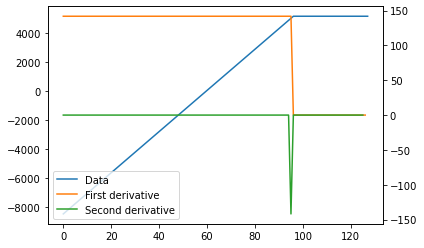

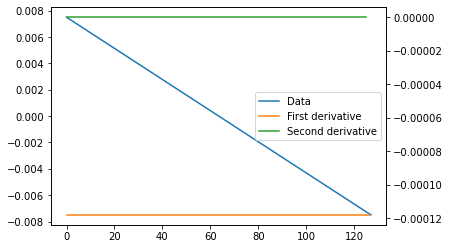

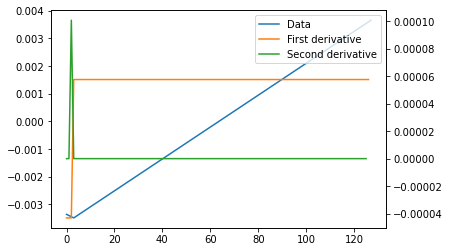

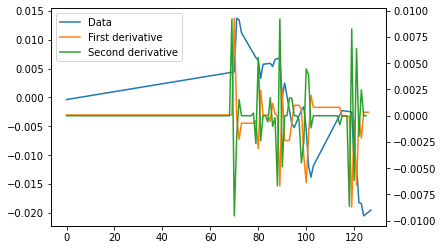

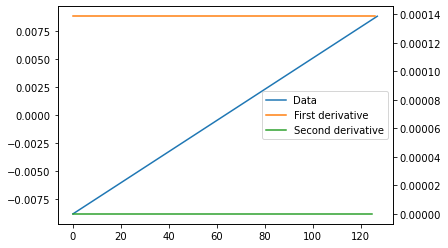

In [34]:
# Look at some examples with plots

for k in toomanyzeros_Z[:5]:
    fig, ax1 = plt.subplots()
    ax1.plot(real_data[k, :nlen], color = 'C0', label = 'Data')
#     plt.show()
    ax2 = ax1.twinx()
    ax2.plot(diff_N[k], color = 'C1', label = 'First derivative')
    ax2.plot(diff2_N[k], color = 'C2', label = 'Second derivative')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2)
    plt.show();
#     plt.savefig('derivtestplot' + str(a) + '.png')
#     plt.close();

In [35]:
np.save(realdata_dir + 'gfast_test_realdata_samps_w_too_many_zeros_N.npy', np.array(toomanyzeros_N))
np.save(realdata_dir + 'gfast_test_realdata_samps_w_too_many_zeros_E.npy', np.array(toomanyzeros_E))
np.save(realdata_dir + 'gfast_test_realdata_samps_w_too_many_zeros_Z.npy', np.array(toomanyzeros_Z))

In [36]:
### REMOVING BAD DATA ###

bad_N = np.load(realdata_dir + 'gfast_test_realdata_samps_w_too_many_zeros_N.npy')
bad_E = np.load(realdata_dir + 'gfast_test_realdata_samps_w_too_many_zeros_E.npy')
bad_Z = np.load(realdata_dir + 'gfast_test_realdata_samps_w_too_many_zeros_Z.npy')

print(len(bad_N))
print(len(bad_E))
print(len(bad_Z))

#print(len(bad_N) + len(bad_E) + len(bad_Z))

442
442
442


In [37]:
comb = np.concatenate((bad_N, bad_E, bad_Z, glitch_indices))
# print(len(comb))

remove_dups = list(set(comb))
remove_dups = np.sort(remove_dups)
# print(len(remove_dups))
np.save(realdata_dir + 'gfast_test_realdata_bad_data_rows_no_dups.npy', remove_dups)
# print(len(remove_dups))

In [38]:
real_data_rembad = np.delete(real_data, remove_dups, axis = 0)
print(real_data.shape)
print(real_data_rembad.shape)

real_metadata_rembad = np.delete(real_metadata, remove_dups, axis = 0)
print(real_metadata.shape)
print(real_metadata_rembad.shape)

(5610, 384)
(5168, 384)
(5610, 4)
(5168, 4)


In [39]:
h5f = h5py.File(realdata_dir + 'gfast_test_realdata_rembad.hdf5', 'w') 
h5f.create_dataset('gfast_test_realdata_rembad', data = real_data_rembad)
h5f.close()

np.save(realdata_dir + 'gfast_test_real_metadata_rembad.npy', real_metadata_rembad)

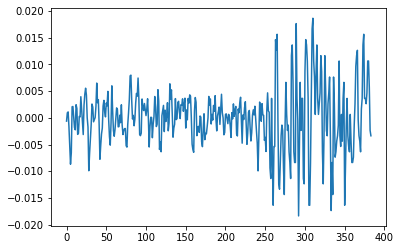

In [40]:
plt.plot(real_data_rembad[0])